In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np

import pandas as pd

[28.362, 23.307, 22.194, 22.051, 22.031, 21.784, 21.943, 22.148, 22.203, 22.171, 22.15, 22.251, 22.295, 22.246, 22.23, 22.13, 22.096, 22.255, 22.347, 22.239, 22.317, 22.245, 22.302, 22.285, 22.261, 22.281, 22.287, 22.292, 22.29, 22.293, 22.296, 22.251]


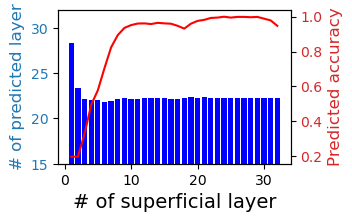

In [17]:
# Data is from flickr8k_lora_val_nohead
import matplotlib.pyplot as plt
# 创建一个新的图
# 假设 layer_num 是层的总数
layer_num=32
layer_keys = list(range(1, layer_num + 1))

# 打开文件
with open('../data/model_accuracies.txt', 'r') as file:
    # 读取文件内容并存成list
    accuracies = file.read()
    accuracies = accuracies.split('\n')
    accuracies = [float(i) for i in accuracies[:len(accuracies) - 1]]

with open('../data/layer_means.txt', 'r') as file:
    # 读取文件内容
    layer_means = file.read()
    layer_means = layer_means.split('\n')
    layer_means = [float(i) for i in layer_means[:len(layer_means) - 1]]

print(layer_means)
fig, ax1 = plt.subplots(figsize=(3, 2))

# 绘制准确率曲线



ax1.set_ylabel('# of predicted layer', color='tab:blue', fontsize=12)
ax1.bar(layer_keys, layer_means, color='b', label='Mean Layer')  # 'b-' 表示蓝色实线
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('# of superficial layer', fontsize=14)
ax1.set_ylim([15, 32])

# # 创建一个共享x轴的第二个轴用于绘制层均值
ax2 = ax1.twinx()  # 共享x轴
ax2.set_xlabel('Layer Key')
ax2.set_ylabel('Predicted accuracy', color='tab:red', fontsize=12)
ax2.plot(layer_keys, accuracies, 'r-', label='Accuracy')  # 'r-' 表示红色实线
ax2.tick_params(axis='y', labelcolor='tab:red')

# ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
# ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

# 显示图表
# plt.title('Accuracy and Mean Layer per Layer Key')

plt.savefig('../figs/design-dynamic-acc.pdf', bbox_inches='tight')
plt.show()

In [6]:
accuracies

'0.198\n0.198\n0.329\n0.495\n0.578\n0.705\n0.824\n0.894\n0.935\n0.951\n0.960\n0.961\n0.957\n0.964\n0.961\n0.959\n0.947\n0.931\n0.959\n0.975\n0.981\n0.992\n0.994\n0.999\n0.994\n0.998\n0.998\n0.996\n0.998\n0.988\n0.978\n0.947\n'

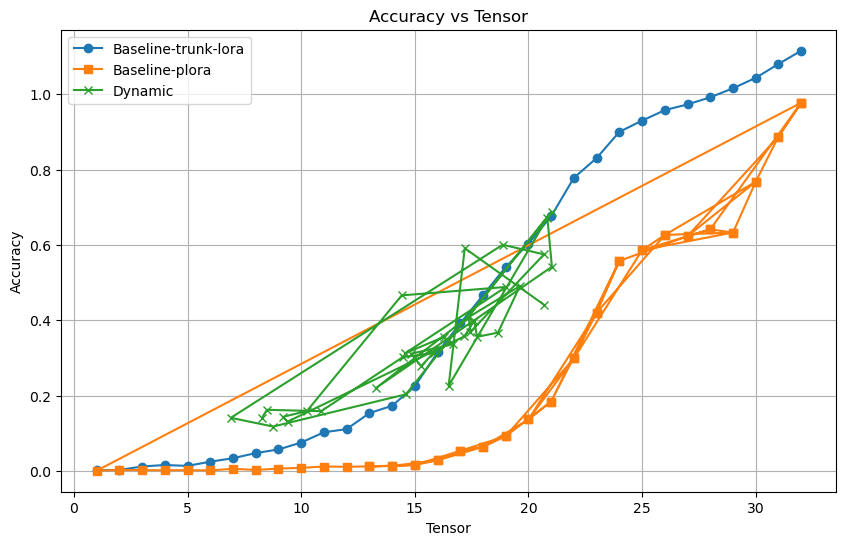

In [10]:
# Load the CSV file
file_path = '../data/processed_e2e_results_coco.csv'
data = pd.read_csv(file_path)

# Ensure all values in 'Tensor' and 'Accuracy' are numeric
data['Tensor'] = pd.to_numeric(data['Tensor'], errors='coerce')
data['Accuracy'] = pd.to_numeric(data['Accuracy'], errors='coerce')

# Filter the data for 'Baseline-trunk-lora' and 'Dynamic'
baseline_trunk_lora = data[data['Type'] == 'Baseline-trunk-lora']
baseline_plora = data[data['Type'] == 'Baseline-plora']
dynamic = data[data['Type'] == 'Dynamic']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(baseline_trunk_lora['Tensor'], baseline_trunk_lora['Accuracy'], label='Baseline-trunk-lora', marker='o')
plt.plot(baseline_plora['Tensor'], baseline_plora['Accuracy'], label='Baseline-plora', marker='s')
plt.plot(dynamic['Tensor'], dynamic['Accuracy'], label='Dynamic', marker='x')

plt.xlabel('Tensor')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tensor')
plt.legend()
plt.grid(True)
plt.savefig('../figs/dynamic-perf.pdf', format='pdf', bbox_inches='tight')

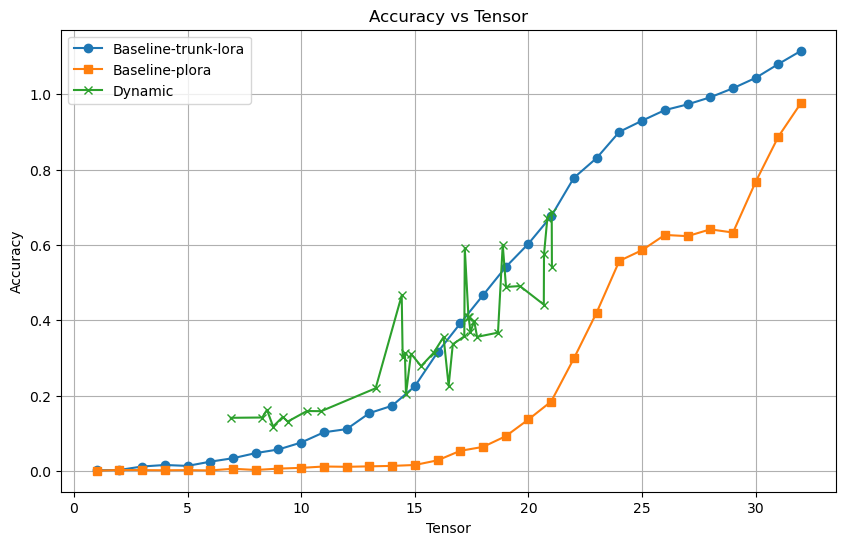

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '../data/processed_e2e_results_coco.csv'
data = pd.read_csv(file_path)

# Ensure all values in 'Tensor' and 'Accuracy' are numeric
data['Tensor'] = pd.to_numeric(data['Tensor'], errors='coerce')
data['Accuracy'] = pd.to_numeric(data['Accuracy'], errors='coerce')

# Filter the data for 'Baseline-trunk-lora' and 'Dynamic'
baseline_trunk_lora = data[data['Type'] == 'Baseline-trunk-lora']
baseline_plora = data[data['Type'] == 'Baseline-plora']
dynamic = data[data['Type'] == 'Dynamic']

# Group by 'Tensor' and get the max 'Accuracy' for each group
baseline_trunk_lora_max = baseline_trunk_lora.groupby('Tensor')['Accuracy'].max().reset_index()
baseline_plora_max = baseline_plora.groupby('Tensor')['Accuracy'].max().reset_index()
dynamic_max = dynamic.groupby('Tensor')['Accuracy'].max().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(baseline_trunk_lora_max['Tensor'], baseline_trunk_lora_max['Accuracy'], label='Baseline-trunk-lora', marker='o')
plt.plot(baseline_plora_max['Tensor'], baseline_plora_max['Accuracy'], label='Baseline-plora', marker='s')
plt.plot(dynamic_max['Tensor'], dynamic_max['Accuracy'], label='Dynamic', marker='x')

plt.xlabel('Tensor')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tensor')
plt.legend()
plt.grid(True)
plt.savefig('../figs/dynamic-perf.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [4]:
tensor_min

array([ 6.9032,  8.2866,  8.4946,  8.764 ,  9.1902,  9.4078, 10.253 ,
       10.8804, 13.2764, 14.4234, 14.466 , 14.5638, 14.612 , 14.8314,
       15.2774, 15.8226, 16.2652, 16.4884, 16.6718, 17.178 , 17.1986,
       17.3602, 17.37  , 17.45  , 17.6124, 17.7394, 18.6598, 18.8684,
       19.0132, 19.6244, 20.6756, 20.6846, 20.8324, 21.0236, 21.0326])